<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/9.%20%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20YOLOv9%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%86%D0%B8%D0%B8%20%D0%B8%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8/%D0%A2%D0%B5%D0%BC%D0%B0_%E2%84%969_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_YOLOv9_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема №9. Использование модели YOLOv9 для решение задач детекции и классификации
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

### Источник: https://docs.ultralytics.com/ru/models/yolov9/

YOLO (You Only Look Once) — это одна из самых популярных моделей для обнаружения объектов в компьютерном зрении. Главная особенность YOLO заключается в том, что, в отличие от других алгоритмов, она анализирует изображение только один раз (отсюда и название "You Only Look Once" — "Ты смотришь только раз"). Это делает YOLO значительно быстрее аналогов при сохранении высокой точности.

1. **Ты смотришь только раз:**
   - YOLO смотрит на всё изображение сразу, а не по частям.
   - Другие методы многократно просматривают изображение, что занимает больше времени.

2. **Сетка и ячейки:**
   - Изображение разбивается на сетку ячеек.
   - Каждая ячейка отвечает за обнаружение объектов в своей области.

3. **Параметры каждой ячейки:**
   - По каждой ячейке предсказывается:
     - Координаты ограничивающей рамки (где находится объект).
     - Вероятность наличия объекта в ячейке.
     - Класс объекта (например, "автомобиль" или "человек").

Таким образом, YOLO быстро и точно находит объекты, что делает его отличным для задач обнаружения в реальном времени.






## **Общая схема моделей семейства YOLO:**

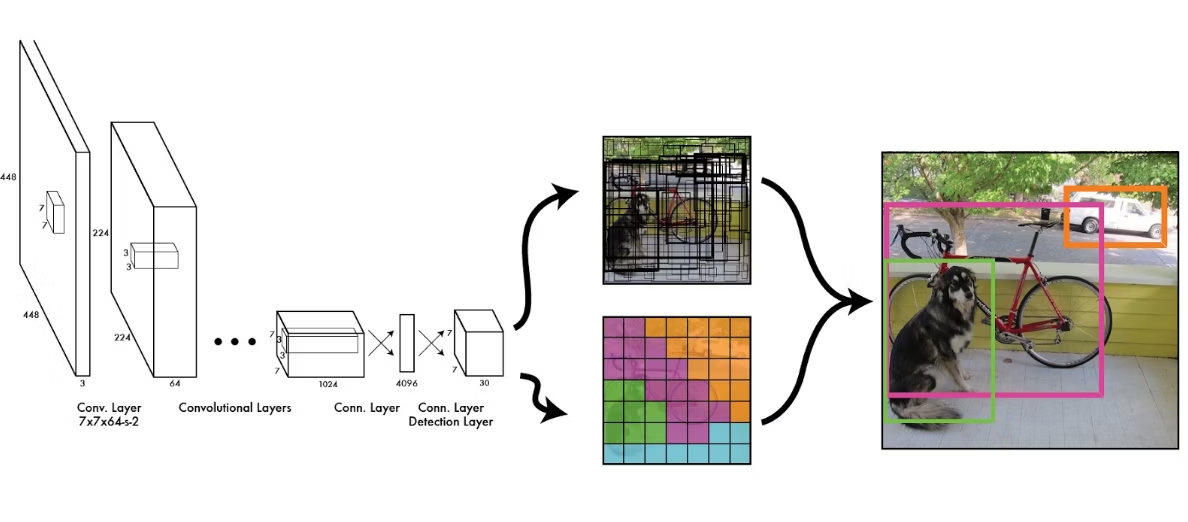

1. **Входное изображение**: На вход модели YOLO подается исходное изображение.

2. **Сверточные слои**: Изображение проходит через несколько сверточных слоев, которые выделяют различные признаки на изображении. Это могут быть границы, текстуры, цвета и другие визуальные характеристики.

3. **Слой обнаружения**: После сверточных слоев следует слой обнаружения. В отличие от других моделей обнаружения объектов, YOLO делает предсказания на основе всего изображения, а не отдельных областей, что позволяет ей обнаруживать объекты более быстро и эффективно.

4. **Карта признаков**: В результате обработки изображения моделью получается карта признаков. Каждый цвет на этой карте представляет определенный признак или объект.

5. **Выходные данные**: На выходе модели получается изображение с обнаруженными объектами. Объекты выделены цветными рамками, и к каждому объекту привязана метка, указывающая, что это за объект.

В данном случае на изображении обнаружены собака, машина и велосипед.

## **Рассмотрим более принцип работы модели YOLO более подробно:**

#### **Шаг 1: Ввод изображения**


Процесс начинается с подачи изображения в нейронную сеть. Изображение стандартизируется до определенного размера (например, 416×416 или 608×608 пикселей в зависимости от версии YOLO).

#### **Шаг 2: Извлечение признаков (Feature Extraction)**


Изображение проходит через **backbone** — глубокую сверточную нейронную сеть:
- Изображение последовательно обрабатывается серией сверточных слоев (как показано в левой части иллюстрации)
- Каждый сверточный слой извлекает всё более абстрактные признаки изображения
- Начальные слои обнаруживают простые элементы (линии, края, текстуры)
- Глубокие слои выявляют более сложные паттерны (формы, части объектов)

#### **Шаг 3: Создание карт признаков (Feature Maps)**


В процессе прохождения через сверточную сеть формируются карты признаков разного размера:
- Видно на схеме, как размерность слоев меняется от 448×448 до меньших размерностей
- Последний "Detection Layer" имеет выход, который можно представить в виде сетки

#### **Шаг 4: Разделение на сетку (Grid)**


Изображение концептуально разделяется на сетку S×S (например, 13×13 в YOLOv3):
- На иллюстрации это отображено в средней части как цветная сетка
- Каждая ячейка сетки отвечает за обнаружение объектов, центры которых попадают в эту ячейку

#### **Шаг 5: Предсказания для каждой ячейки сетки**


Для каждой ячейки сетки модель одновременно предсказывает:
- B ограничивающих рамок (bounding boxes)
- Вероятности присутствия объекта (objectness score)
- C классовых вероятностей (для каждого возможного класса)

#### **Шаг 6: Предсказание параметров ограничивающих рамок**


Для каждой потенциальной ограничивающей рамки модель предсказывает:
- Координаты центра рамки (x, y) относительно размеров ячейки
- Ширину и высоту рамки (w, h) относительно всего изображения
- Уверенность (confidence), что рамка содержит объект

Это соответствует финальному выходному слою сети, показанному на схеме как "Detection Layer".

#### **Шаг 7: Предсказание классов**


Одновременно с предсказанием ограничивающих рамок, модель предсказывает вероятности принадлежности объекта к каждому классу:
- Для каждой ячейки определяются вероятности всех возможных классов
- Эти вероятности условны (при условии, что объект присутствует)

#### **Шаг 8: Расчет итоговой оценки (score)**


Для каждой ограничивающей рамки вычисляется итоговая оценка:
- Confidence_score × Class_probability
- Это дает итоговую вероятность для каждого класса в каждой рамке

#### **Шаг 9: Фильтрация предсказаний**


Применяется пороговая фильтрация и подавление немаксимумов (Non-Maximum Suppression, NMS):
- Отбрасываются рамки с низкой итоговой оценкой (ниже порогового значения)
- Если несколько рамок перекрываются и относятся к одному объекту, оставляется только рамка с наивысшей оценкой

#### **Шаг 10: Финальный вывод**


Итоговый результат — набор ограничивающих рамок с классами и уверенностью:
- Как показано на правой части изображения: собака (розовая рамка), велосипед (зеленая рамка) и автомобиль (оранжевая рамка)
- Каждая рамка имеет координаты, размеры, класс объекта и значение уверенности

### **Основные особенности YOLO**









- **Единый проход** — все вычисления происходят за один проход через нейронную сеть
- **Параллельная обработка** — определение местоположения и классификация выполняются одновременно
- **Anchor boxes** — в современных версиях YOLO используются предопределенные шаблоны рамок, адаптируемые к конкретным объектам
- **Многоуровневые предсказания** — более поздние версии YOLO используют Feature Pyramid Network для обнаружения объектов разного размера

### **Функции потерь в модели YOLO:**

Функция потерь в YOLO объединяет несколько компонентов, чтобы оценить, насколько хорошо модель предсказывает правильные ограничивающие рамки и классы объектов. Основные компоненты:

1. **Ошибка ограничивающей рамки (Bounding Box Error):**
   - Оценивает разницу между предсказанными и истинными координатами рамок.
   - Использует функцию среднеквадратичной ошибки (MSE) для координат центра рамки и корня из MSE для ширины и высоты.

2. **Ошибка классификации (Classification Error):**
   - Оценивает, насколько точно модель классифицирует объекты.
   - Использует кросс-энтропию для оценки вероятности принадлежности к правильному классу.

3. **Ошибка уверенности (Confidence Error):**
   - Оценивает, насколько уверенно модель предсказывает наличие объекта в рамке.
   - Также использует кросс-энтропию для оценки вероятности наличия объекта.

4. **Общая функция потерь YOLO** (**DFL Loss**) — учитывает три этих компонента.

**DFL Loss** (Distribution Focal Loss) — это функция потерь, используемая в моделях YOLO, в частности в YOLOv8/YOLOv9.

*Особенности:*

  1. **Проблема дисбаланса классов:**
    - В задачах обнаружения объектов часто возникает дисбаланс классов.
    - Например, на изображениях может быть много автомобилей, но мало велосипедов.
    - Обучение модели на таких данных может привести к тому, что она будет хорошо находить автомобили, но плохо — велосипеды.

  2. **Цель DFL Loss:**
    - DFL Loss решает проблему дисбаланса классов.
    - Он учитывает, что некоторые классы редки, и старается сделать модель более чувствительной к ним.

  3. **Как это работает:**
    - DFL Loss адаптирует потери на основе разницы между предсказанными вероятностями и фактическим распределением классов.
    - Если модель предсказывает высокую вероятность для класса (например, для автомобилей), но фактическое распределение в данных меньше, DFL Loss накладывает штраф за несоответствие.

  4. **Применение:**
    - DFL Loss используется вместе с другими функциями потерь.
    - Вместе они помогают модели более точно обнаруживать объекты и учитывать их редкость.

## 0. Прежде чем начать
Давайте убедимся, что у нас есть доступ к GPU. Для этого мы можем использовать команду `nvidia-smi`. В случае возникновения проблем перейдите в `Edit` -> `Настройки ноутбука` -> `Аппаратный ускоритель`, установите значение `GPU`, а затем нажмите `Сохранить`.

In [ ]:
!nvidia-smi

Mon Apr 22 10:38:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**ПРИМЕЧАНИЕ:** Чтобы нам было проще управлять наборами данных, изображениями и моделями, мы создаем константу `HOME`.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## 1. Установка зависимостей

**ПРИМЕЧАНИЕ:** YOLOv9 является самой новой версией моделей семейства YOLO. Рекомендуется использовать форк основного репозитория. Код в модуле `detect.py` содержит ошибку, которая не позволяет делать выводы. Эта ошибка исправлена в форке.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (164/164), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00


**ПРИМЕЧАНИЕ:** Установим пакет [`roboflow`](https://pypi.org/project/roboflow), который мы будем использовать для загрузки нашего набора данных из [Roboflow Universe](https://universe.roboflow.com/).

In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00


## 2. Загрузим весовые коэффициенты модели

**ПРИМЕЧАНИЕ:** В статье YOLOv9 также упоминаются версии `yolov9-s` и `yolov9-m`, но веса для этих моделей еще не доступны в [репозитории](https://github.com/WongKinYiu/yolov9) YOLOv9.

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Apr 22 07:45 .
drwxr-xr-x 1 root root      4096 Apr 22 07:45 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## 3. Загрузка примера

**ПРИМЕЧАНИЕ:** Если вы хотите запустить вывод, используя в качестве входных данных собственный файл, просто загрузите изображение в Google Colab и измените `SOURCE_IMAGE_PATH` на путь, ведущий к вашему файлу.

In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

In [ ]:
SOURCE_IMAGE_PATH

'/content/dog.jpeg'

## 4. Обнаружение с помощью предварительно обученной модели на датасете COCO (Common Objects in Context)

### Список классов:

```
{
1: 'person', # человек
2: 'bicycle', # велосипед
3: 'car', # автомобиль
4: 'motorcycle', # мотоцикл
5: 'airplane', # самолет
6: 'bus', # автобус
7: 'train', # поезд
8: 'truck', # грузовик
9: 'boat', # лодка
10: 'traffic light', # светофор
11: 'fire hydrant', # гидрант
12: 'stop sign', # знак стоп
13: 'parking meter', # паркометр
14: 'bench', # скамейка
15: 'bird', # птица
16: 'cat', # кошка
17: 'dog', # собака
18: 'horse', # лошадь
19: 'sheep', # овца
20: 'cow', # корова
21: 'elephant', # слон
22: 'bear', # медведь
23: 'zebra', # зебра
24: 'giraffe', # жираф
25: 'backpack', # рюкзак
26: 'umbrella', # зонт
27: 'handbag', # сумка
28: 'tie', # галстук
29: 'suitcase', # чемодан
30: 'frisbee', # фрисби
31: 'skis', # лыжи
32: 'snowboard', # сноуборд
33: 'sports ball', # спортивный мяч
34: 'kite', # воздушный змей
35: 'baseball bat', # бейсбольная бита
36: 'baseball glove', # бейсбольная перчатка
37: 'skateboard', # скейтборд
38: 'surfboard', # серфборд
39: 'tennis racket', # ракетка для тенниса
40: 'bottle', # бутылка
41: 'wine glass', # бокал для вина
42: 'cup', # чашка
43: 'fork', # вилка
44: 'knife', # нож
45: 'spoon', # ложка
46: 'bowl', # миска
47: 'banana', # банан
48: 'apple', # яблоко
49: 'sandwich', # бутерброд
50: 'orange', # апельсин
51: 'broccoli', # брокколи
52: 'carrot', # морковь
53: 'hot dog', # хот-дог
54: 'pizza', # пицца
55: 'donut', # пончик
56: 'cake', # торт
57: 'chair', # стул
58: 'couch', # диван
59: 'potted plant', # растение в горшке
60: 'bed', # кровать
61: 'dining table', # обеденный стол
62: 'toilet', # туалет
63: 'tv', # телевизор
64: 'laptop', # ноутбук
65: 'mouse', # компьютерная мышь
66: 'remote', # пульт управления
67: 'keyboard', # клавиатура
68: 'cell phone', # мобильный телефон
69: 'microwave', # микроволновая печь
70: 'oven', # духовка
71: 'toaster', # тостер
72: 'sink', # раковина
73: 'refrigerator', # холодильник
74: 'book', # книга
75: 'clock', # часы
76: 'vase', # ваза
77: 'scissors', # ножницы
78: 'teddy bear', # медвежонок Тедди
79: 'hair drier', # фен для волос
80: 'toothbrush' # зубная щетка
}
```



### YOLOv9 (gelan-c)

YOLOv9, также известная как GELAN-C, является значительным продвижением в области обнаружения объектов в реальном времени. Эта модель представляет такие новаторские техники, как программируемая градиентная информация (PGI) и обобщенная эффективная сеть агрегирования слоев (GELAN)

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 113.8ms
Speed: 0.4ms pre-process, 113.8ms inference, 796.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**ПРИМЕЧАНИЕ:** По умолчанию результаты каждого последующего сеанса вывода сохраняются в `{HOME}/yolov9/runs/detect/`, в каталогах с именами `exp`, `exp2`, `exp3`, .... Вы можете переопределить это поведение с помощью параметра `--name`.

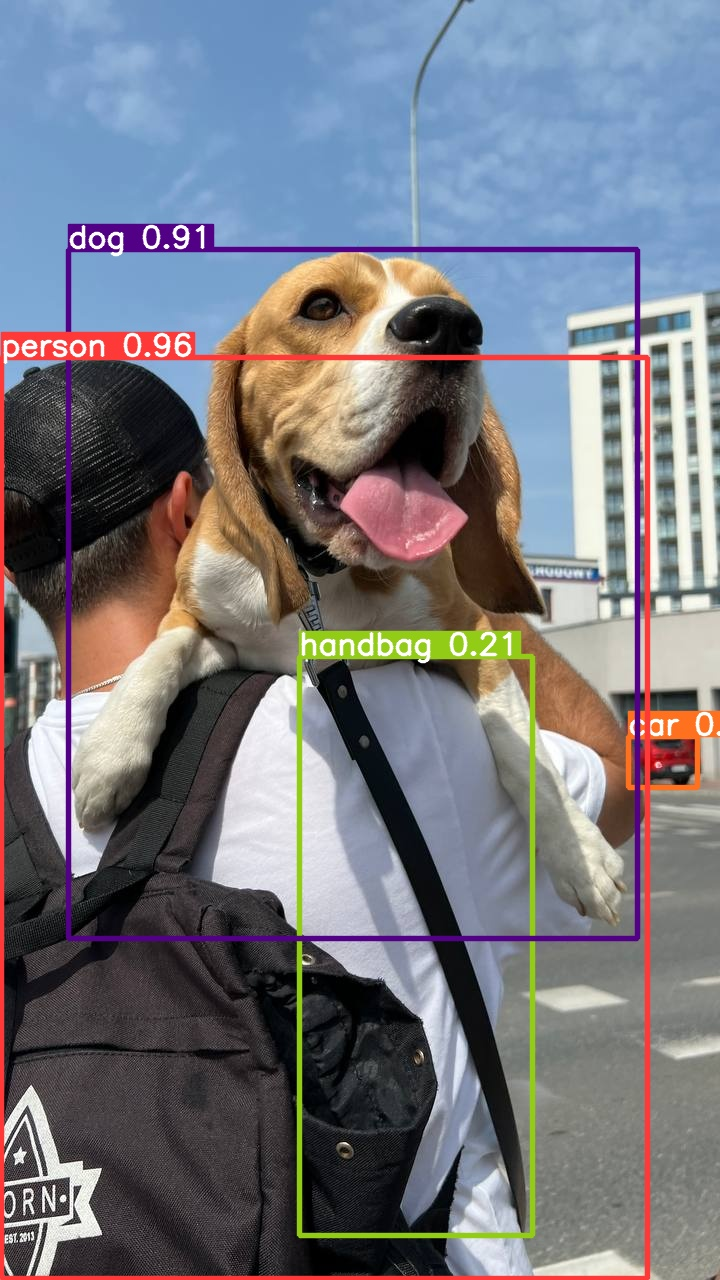

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## YOLOv9 (yolov9-e)

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 167.7ms
Speed: 0.4ms pre-process, 167.7ms inference, 570.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


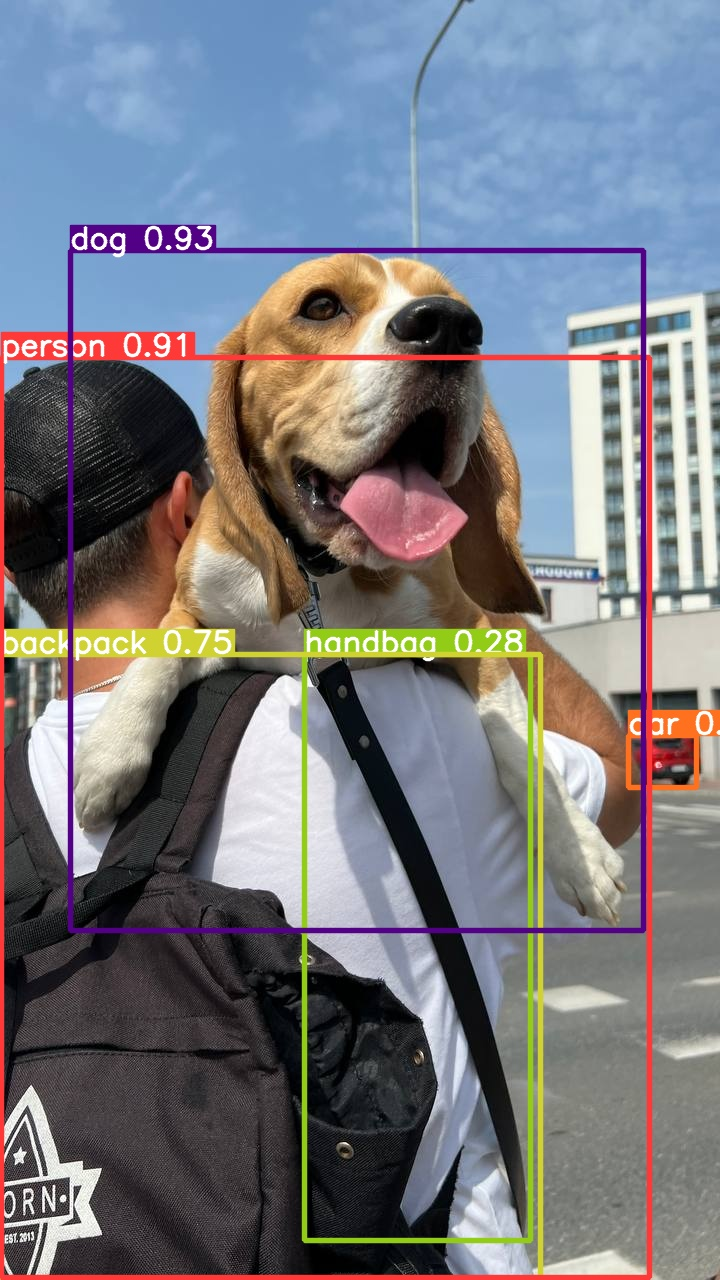

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

## 5. Авторизация и загрузка датасета

**ПРИМЕЧАНИЕ:** Набор данных должен быть сохранен в директории `{HOME}/yolov9`!

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


**ПРИМЕЧАНИЕ:** В этом блокноте используется набор данных, сформированный на сервисе [Roboflow Universe](https://universe.roboflow.com).

Если вы планируете развернуть свою модель в Roboflow после обучения, убедитесь, что вы являетесь владельцем набора данных и что ни одна модель не связана с версией набора данных, на котором вы собираетесь проводить обучение!

In [ ]:
# Импортируем библиотеку roboflow
import roboflow

# Входим в систему roboflow. Для этого вам потребуется ввести свои учетные данные.
roboflow.login()

# Создаем экземпляр класса Roboflow
rf = roboflow.Roboflow()

# Получаем доступ к проекту в рабочем пространстве.
# Здесь "alexandre-b2d69" - это имя рабочего пространства, а "first-ugfem" - имя проекта.

project = rf.workspace("alexandre-b2d69").project("first-ugfem")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


Вывод списка версий:

(Если список пуст, то необходимо создать версию в настройках проекта на [сайте](https://app.roboflow.com/) )

In [ ]:
project.list_versions()

[{'id': 'alexandre-b2d69/first-ugfem/1', 'name': '2024-04-22 9:47am', 'created': 1713768469.669, 'images': 799, 'splits': {'valid': 66, 'test': 34, 'train': 699}, 'preprocessing': {'auto-orient': True, 'resize': {'width': 640, 'format': 'Stretch to', 'height': 640}}, 'augmentation': {}, 'exports': ['yolov9']}]


Указываем версию проекта и скачиваем датасет для этой версии проекта в формате `yolov9`:

In [ ]:
version = project.version(1)

dataset = version.download("yolov9")


Extracting Dataset Version Zip to First-1 in yolov9:: 100%|██████████| 1610/1610 [00:00<00:00, 6688.80it/s]


## 6. Обучение модели

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

In [ ]:
# Переходим в директорию yolov9 в домашнем каталоге
%cd {HOME}/yolov9

# Запускаем скрипт train.py с различными параметрами
!python train.py \
# Устанавливаем размер пакета равным 16
--batch 16 \
# Устанавливаем количество эпох равным 25
--epochs 25 \
# Устанавливаем размер изображения равным 640
--img 640 \
# Устанавливаем устройство для обучения (в данном случае, это GPU с индексом 0)
--device 0 \
# Устанавливаем минимальное количество элементов в пакете равным 0
--min-items 0 \
# Устанавливаем параметр close-mosaic равным 15
--close-mosaic 15 \
# Указываем путь к файлу data.yaml, который содержит информацию о датасете
--data {dataset.location}/data.yaml \
# Указываем путь к файлу с весами модели
--weights {HOME}/weights/gelan-c.pt \
# Указываем путь к файлу конфигурации модели
--cfg models/detect/gelan-c.yaml \
# Указываем путь к файлу с гиперпараметрами
--hyp hyp.scratch-high.yaml


## 7. Статистика обучения

**ПРИМЕЧАНИЕ:** По умолчанию результаты каждой последующей тренировки сохраняются в `{HOME}/yolov9/runs/train/`, в директориях с именами `exp`, `exp2`, `exp3`, .... Вы можете переопределить это поведение с помощью параметра `--name`.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				   PR_curve.png		  val_batch0_pred.jpg
events.out.tfevents.1713772009.2dce0aa803b3.992.0  R_curve.png		  val_batch1_labels.jpg
F1_curve.png					   results.csv		  val_batch1_pred.jpg
hyp.yaml					   results.png		  val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg	  val_batch2_pred.jpg
labels.jpg					   train_batch1.jpg	  weights
opt.yaml					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg


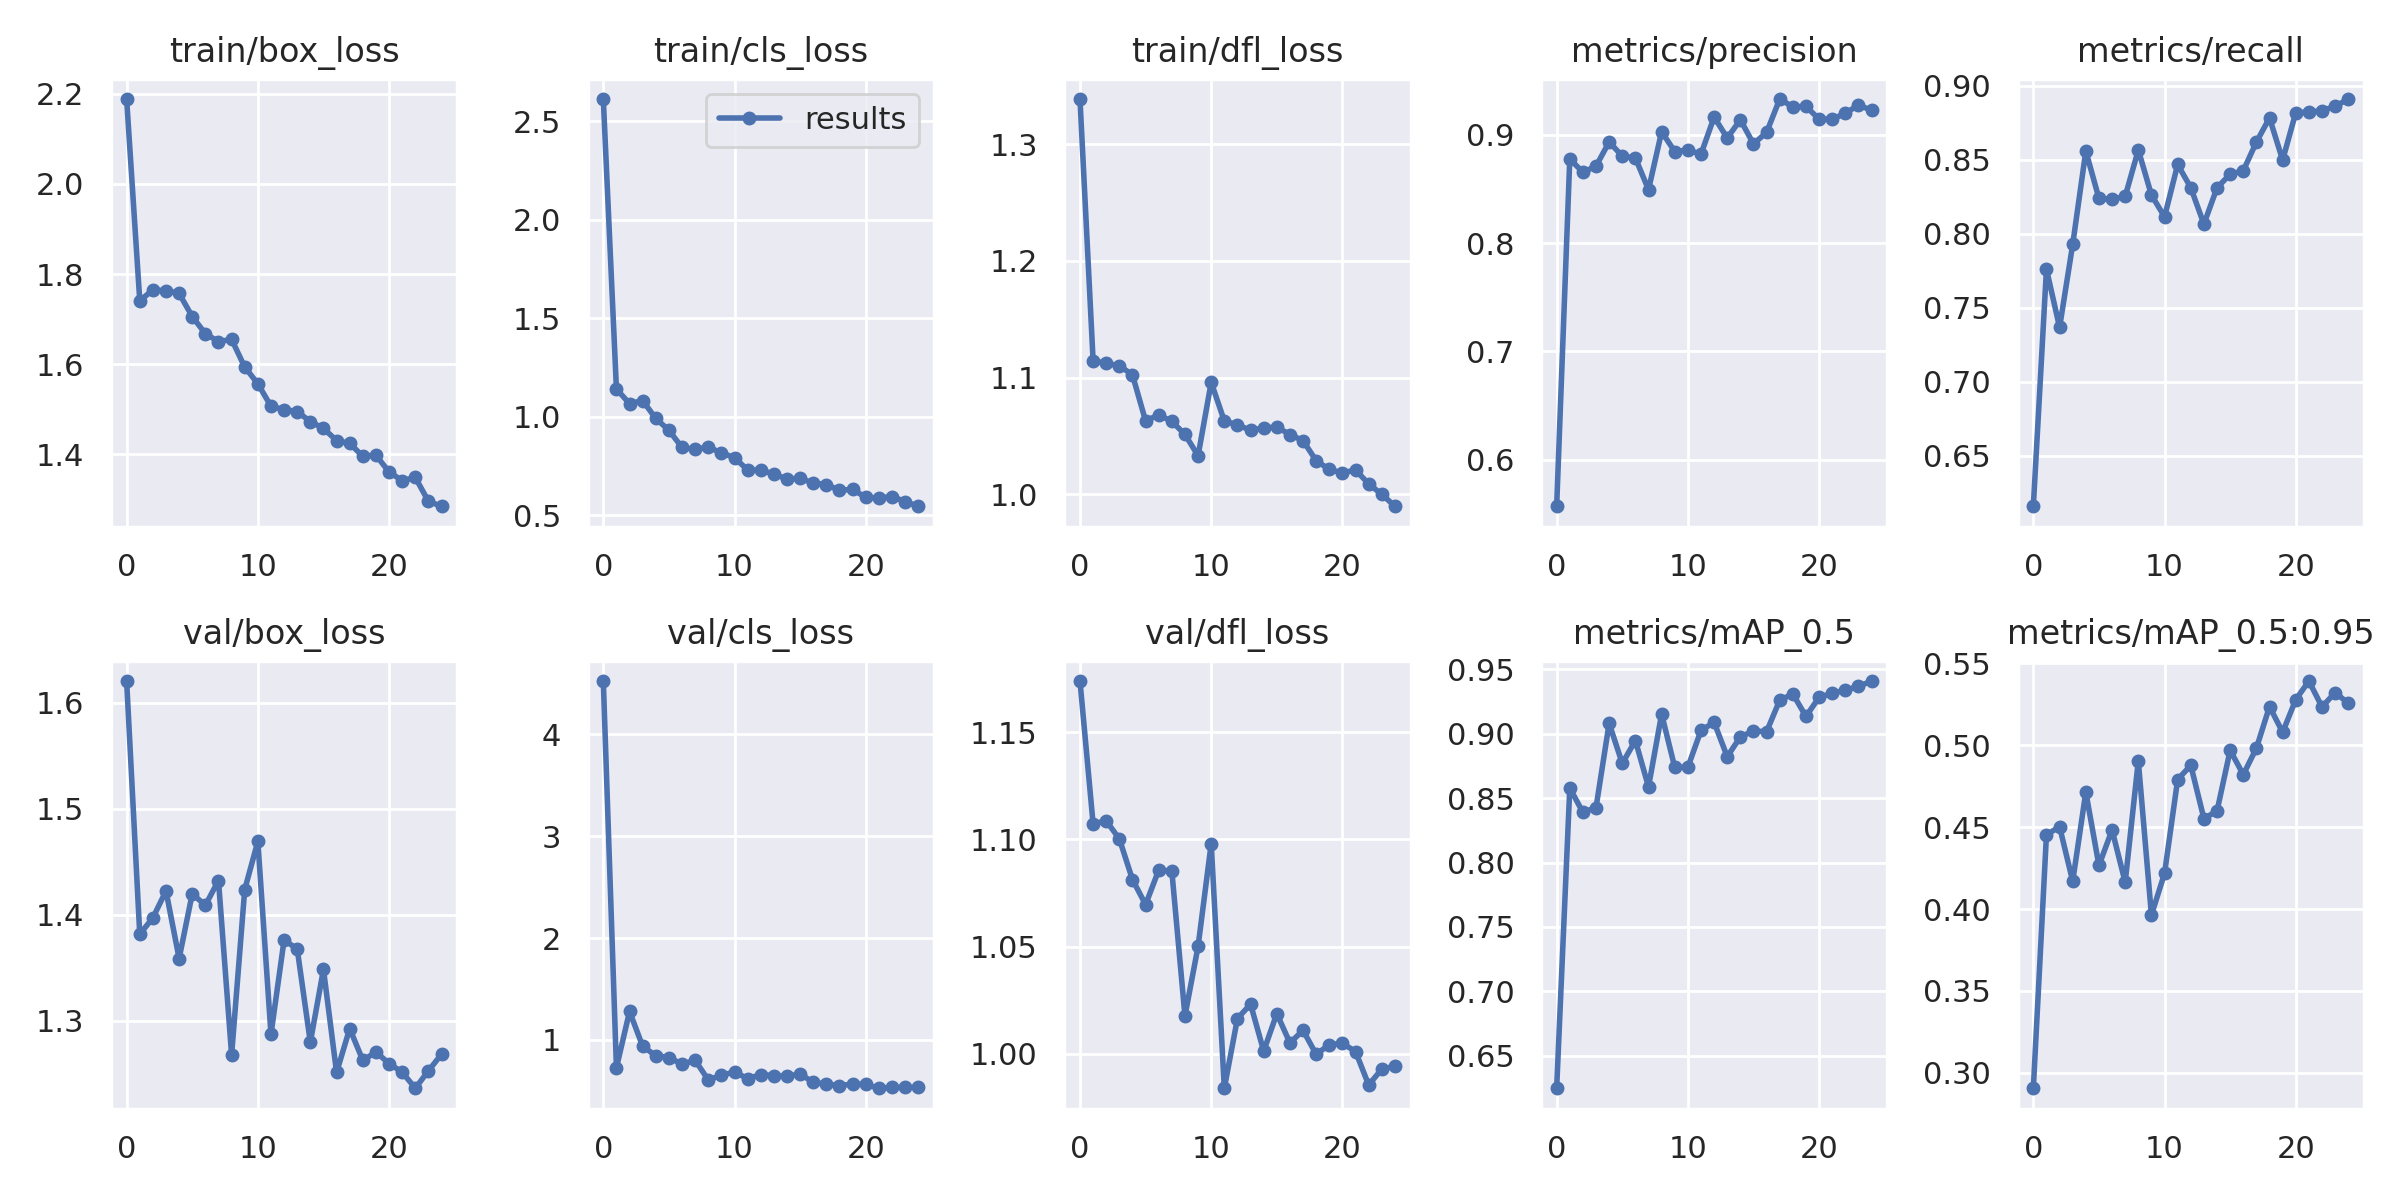

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

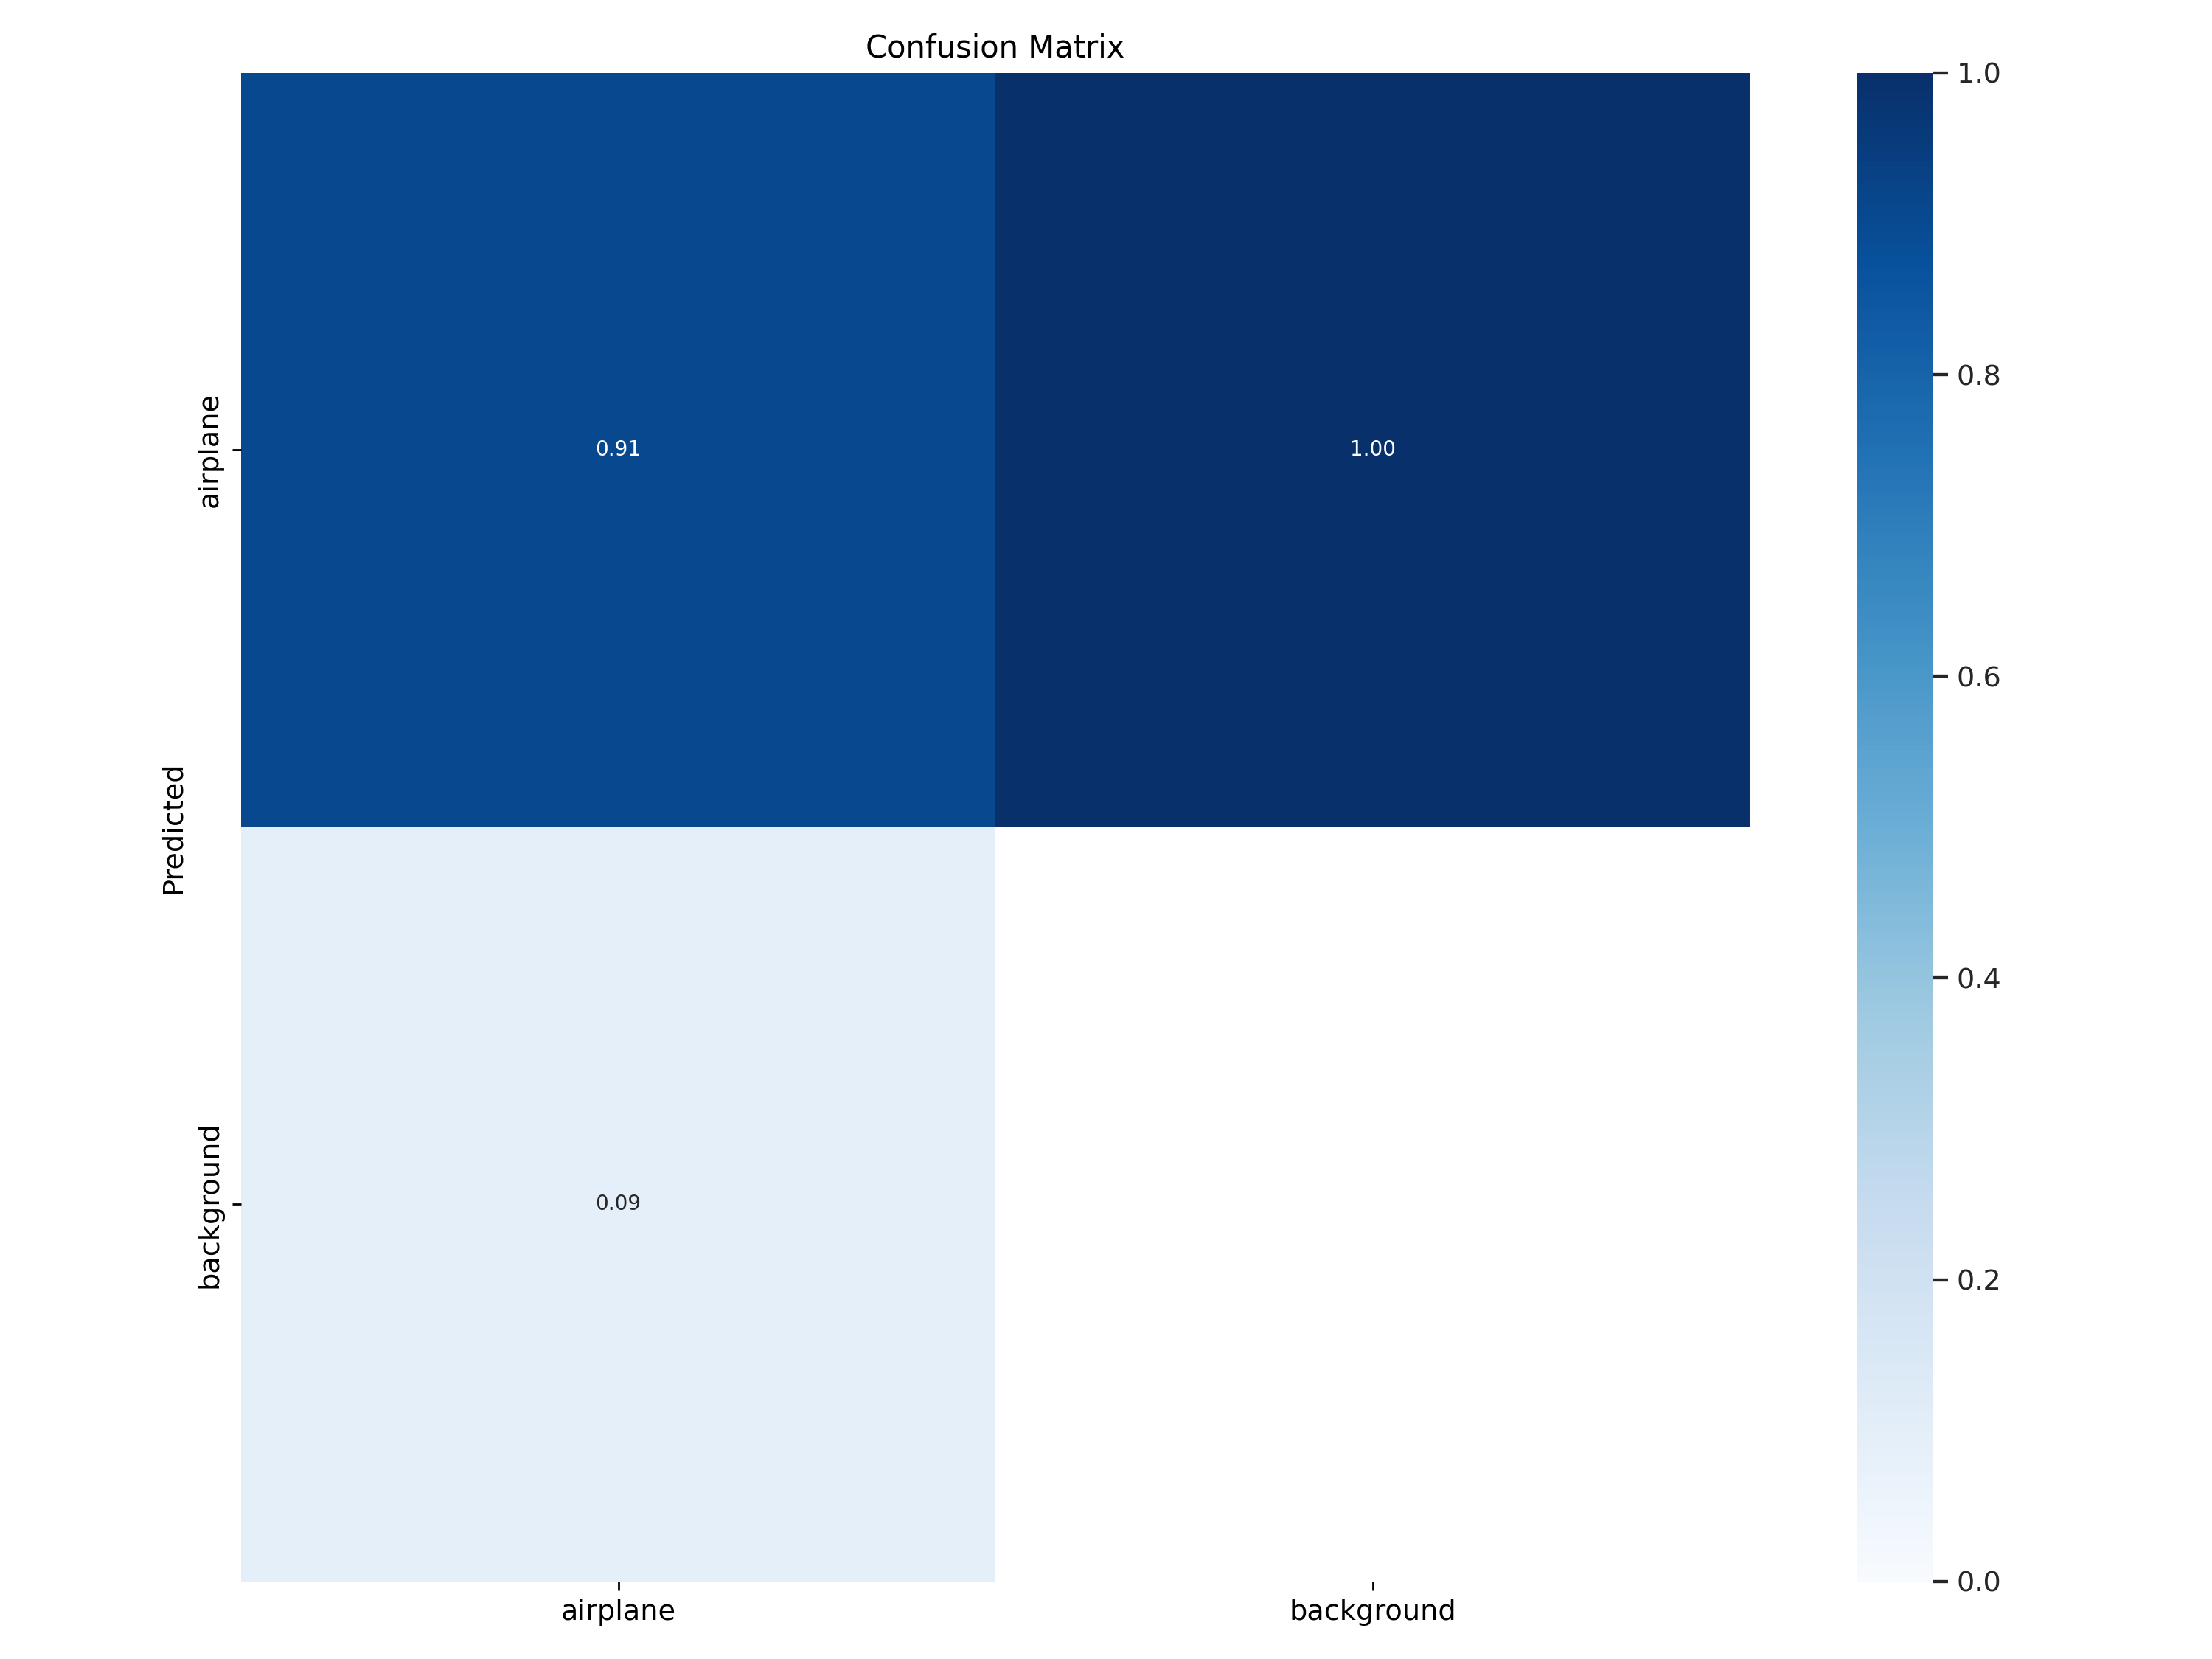

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

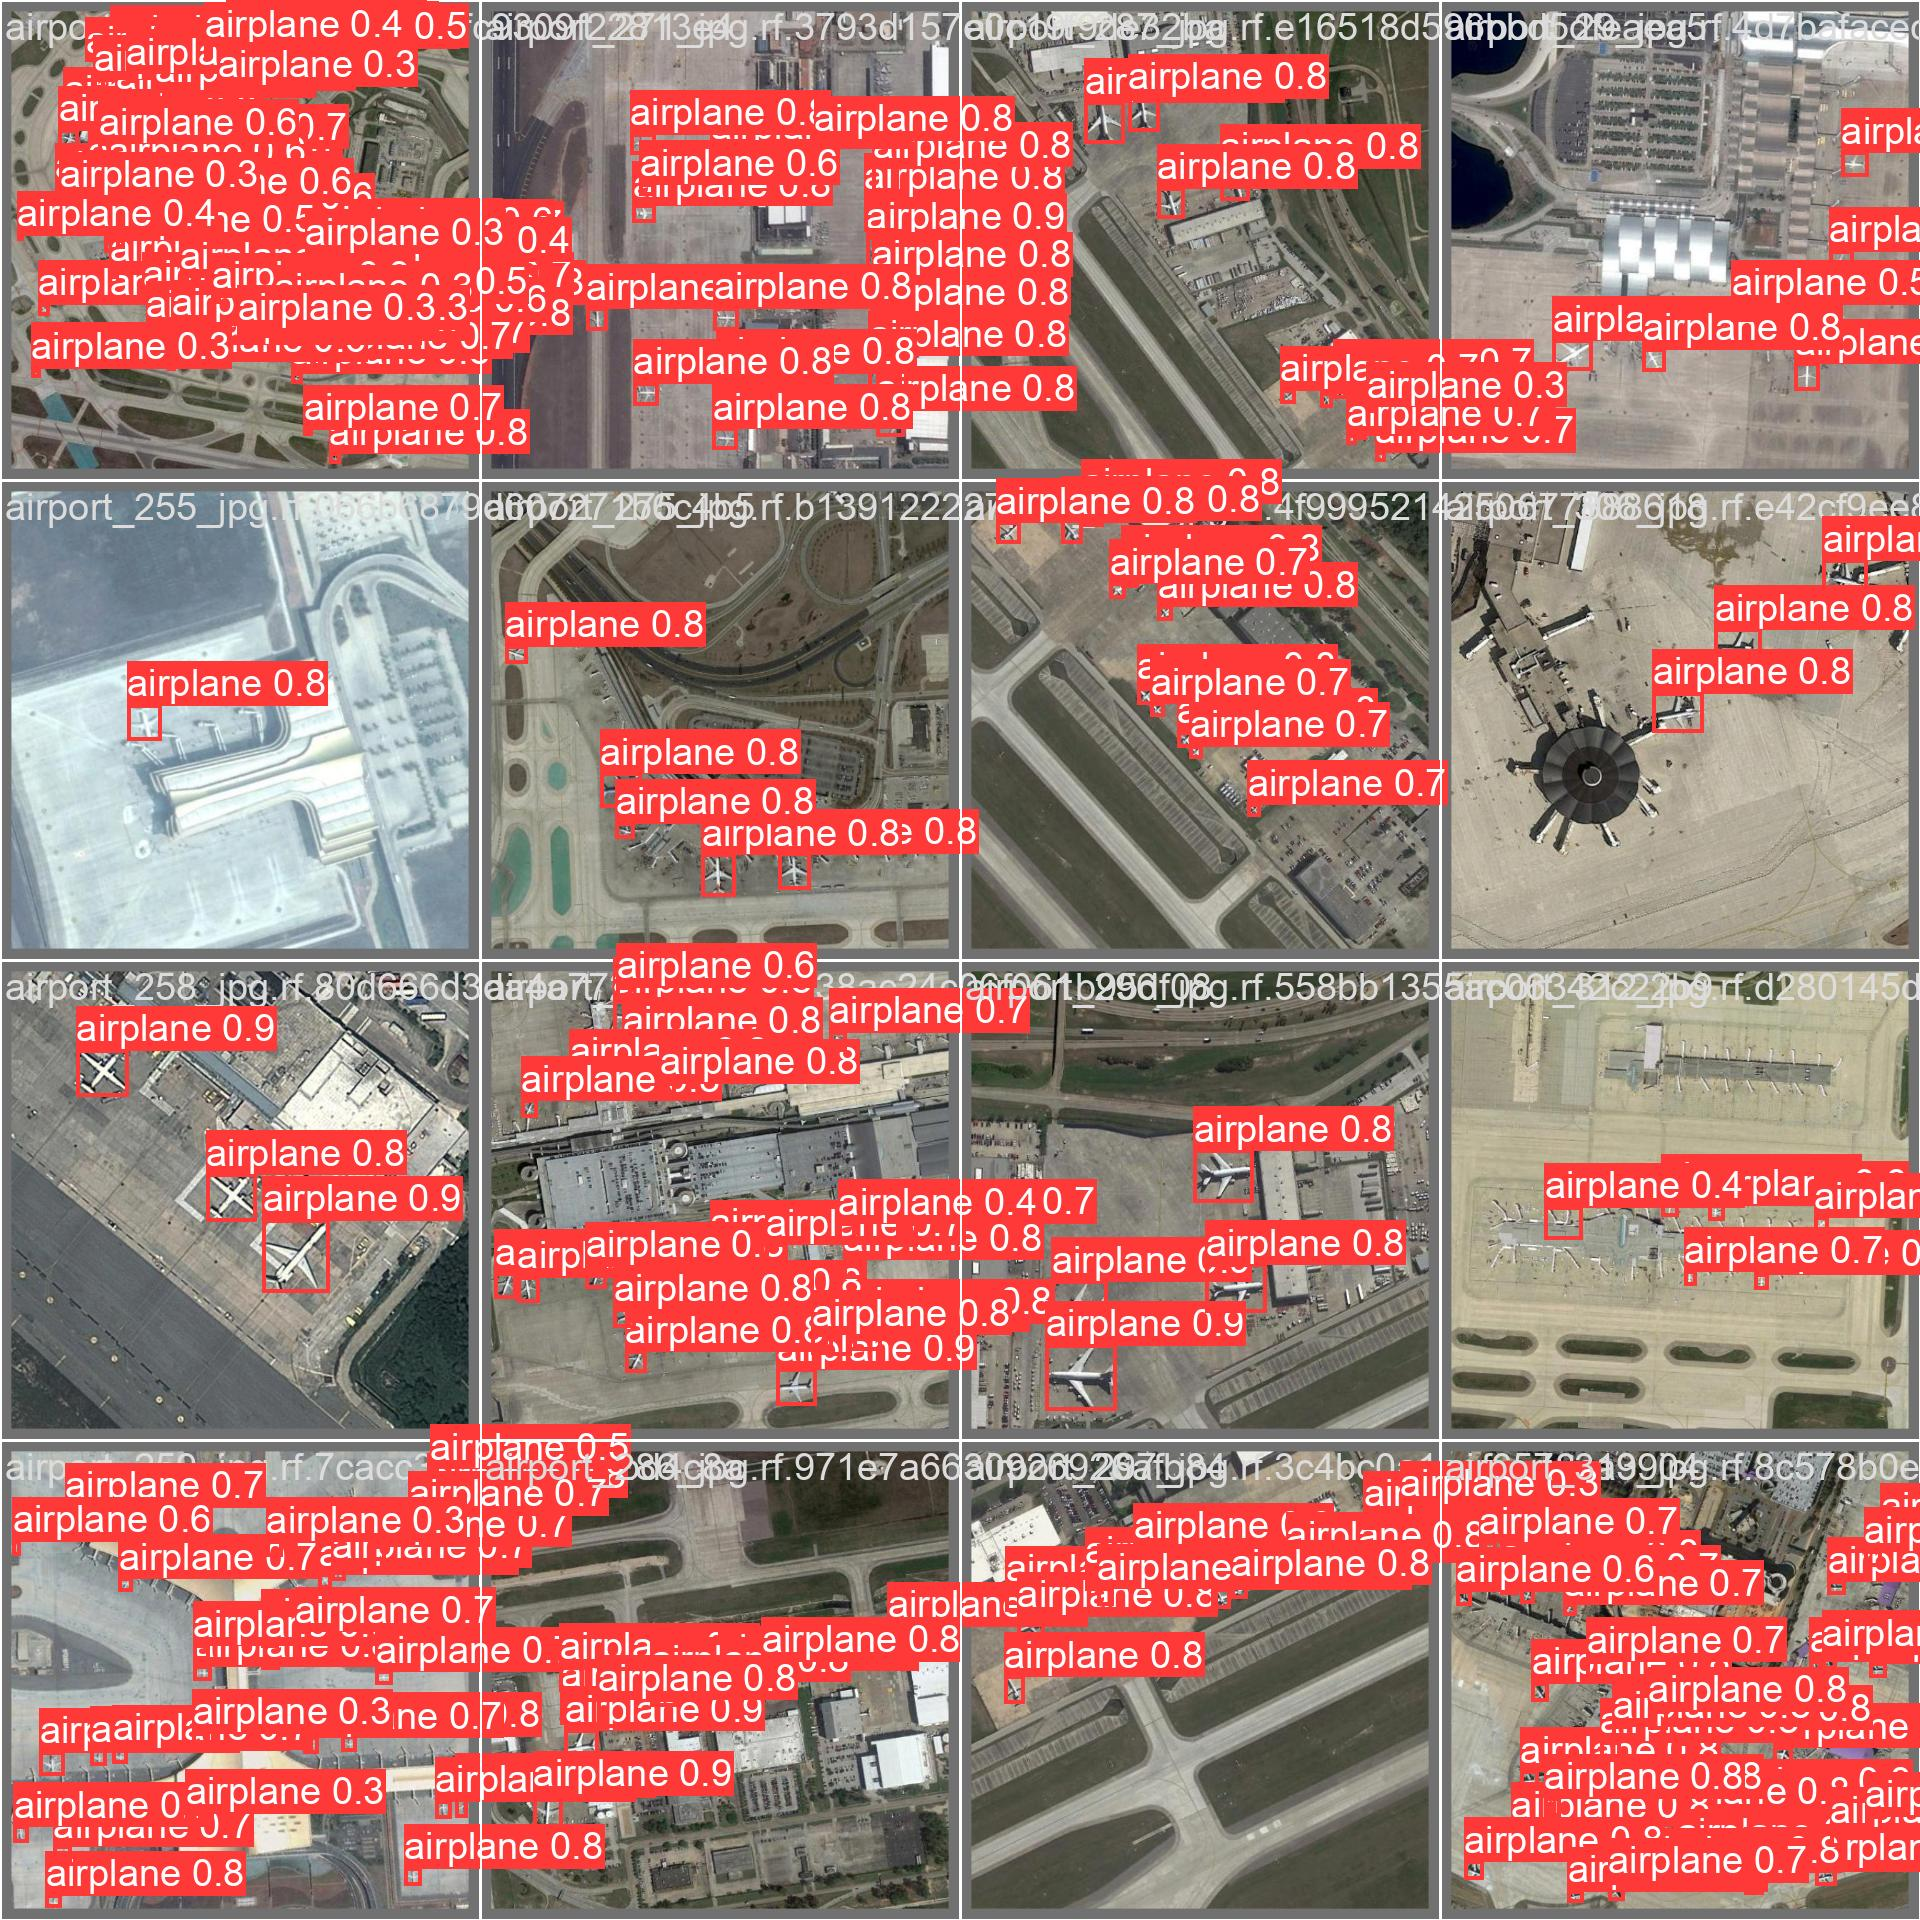

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## 8. Проверка на валидационном наборе

In [ ]:
# Переходим в директорию yolov9 в домашнем каталоге
%cd {HOME}/yolov9

# Запускаем скрипт val.py с различными параметрами
!python val.py \
# Устанавливаем размер изображения равным 640
--img 640 \
# Устанавливаем размер пакета равным 32
--batch 32 \
# Устанавливаем пороговое значение для детекции объектов равным 0.001
--conf 0.001 \
# Устанавливаем пороговое значение для пересечения областей равным 0.7
--iou 0.7 \
# Устанавливаем устройство для валидации (в данном случае, это GPU с индексом 0)
--device 0 \
# Указываем путь к файлу data.yaml, который содержит информацию о датасете
--data {dataset.location}/data.yaml \
# Указываем путь к файлу с весами модели
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

## 9. Работа с обученной моделью

In [ ]:
# Запускаем скрипт detect.py с различными параметрами
!python detect.py \
# Устанавливаем размер изображения равным 1280
--img 1280 \
# Устанавливаем пороговое значение для детекции объектов равным 0.1
--conf 0.1 \
# Устанавливаем устройство для детекции (в данном случае, это GPU с индексом 0)
--device 0 \
# Указываем путь к файлу с весами модели
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
# Указываем путь к исходным изображениям, на которых будет проводиться детекция
--source {dataset.location}/test/images

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

**ПРИМЕЧАНИЕ:** Как и в случае с behore, результаты анализа сохраняются в соответствующем каталоге внутри `{HOME}/yolov9/runs/detect/`.Давайте рассмотрим некоторые из этих результатов.

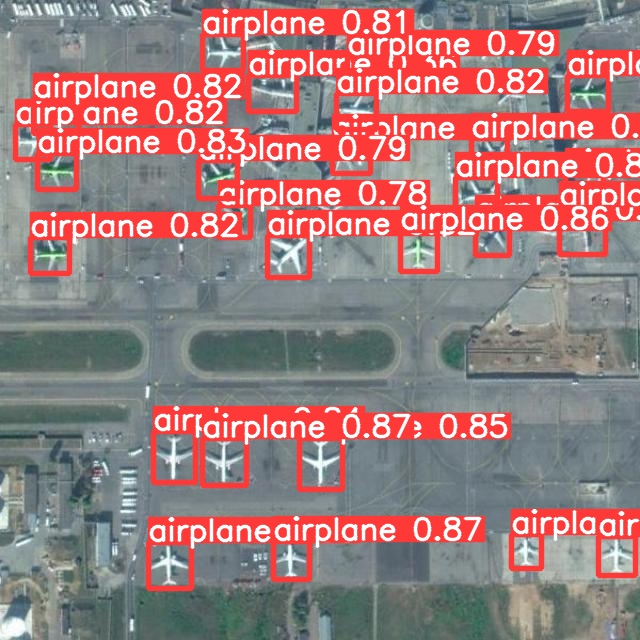

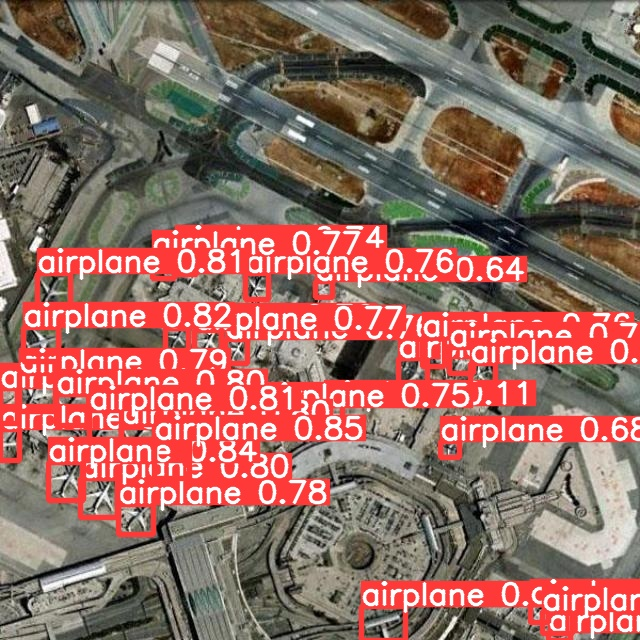

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## 10. Развертывание модели YOLOv9

**ПРИМЕЧАНИЕ:** Для развертывания модели и отображения результатов выводов нам понадобятся два дополнительных пакета - [`inference`](https://pypi.org/project/inference) и [`supervision`](https://pypi.org/project/supervision).Давайте установим и импортируем их!

In [ ]:
!pip install -q inference supervision

In [ ]:
import cv2
import random
# Импортируем модуль getpass, который предоставляет
# портативный способ обработки паролей безопасным образом
import getpass

# Импортируем модуль supervision (sv), для аннотации конечных изображений
import supervision as sv

# Импортируем функцию get_model из модуля inference.
# Эта функция, вероятно, используется для загрузки
# обученной модели и для выполнения вывода
from inference import get_model


# %matplotlib inline

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


**ПРИМЕЧАНИЕ:** Прежде чем использовать вашу модель в Inference, необходимо загрузить веса в Roboflow Universe.Убедитесь, что вы указали правильный `model_type` - `yolov9`, и что версия проекта совпадает с версией набора данных, который вы использовали для обучения, обозначенной `[1]`. В моем случае это `1`.


In [ ]:
# Запускаем процесс развертывания модели с помощью метода deploy объекта version
version.deploy(
    # Указываем тип модели, в данном случае "yolov9"
    model_type="yolov9",
    # Указываем путь к файлу с весами модели
    model_path=f"{HOME}/yolov9/runs/train/exp"
)

View the status of your deployment at: https://app.roboflow.com/alexandre-b2d69/first-ugfem/1
Share your model with the world at: https://universe.roboflow.com/alexandre-b2d69/first-ugfem/model/1


**ПРИМЕЧАНИЕ:** Теперь мы можем загрузить нашу модель в любое место, используя присвоенный `model_id`, обозначенный `[2]`.Для загрузки модели вам понадобится ваш [`ROBOFLOW_API_KEY`](https://docs.roboflow.com/api-reference/authentication).

In [ ]:
# Используем функцию getpass для безопасного ввода API-ключа Roboflow
ROBOFLOW_API_KEY = getpass.getpass()

# Получаем модель с помощью функции get_model. Мы передаем идентификатор модели и API-ключ.
model = get_model(
    # Идентификатор модели, который состоит из имени проекта и номера версии
    model_id="first-ugfem/1",
    # API-ключ для доступа к Roboflow
    api_key=ROBOFLOW_API_KEY
)

··········


Выберем случайное изображение из нашего тестового подмножества и обнаружим объекты, используя только что настроенную модель:


In [ ]:
# Получаем список путей к изображениям в указанной директории с определенными расширениями
image_paths = sv.list_files_with_extensions(
    # Указываем директорию, где находятся изображения
    directory=f"{dataset.location}/test/images",
    # Указываем расширения файлов, которые мы хотим найти
    extensions=['png', 'jpg', 'jpeg']
)

# Выбираем случайный путь к изображению из списка
image_path = random.choice(image_paths)

# Читаем изображение с помощью функции imread из библиотеки cv2
image = cv2.imread(image_path)

# Производим детекцию объектов на изображении с помощью модели
result = model.infer(
    # Указываем изображение, на котором нужно провести детекцию
    image,
    # Устанавливаем пороговое значение для детекции объектов равным 0.1
    confidence=0.1
)[0]

# Преобразуем результат детекции в объект Detections
detections = sv.Detections.from_inference(result)

Наконец, давайте воспользуемся supervision и [аннотируем](https://supervision.roboflow.com/develop/annotators/) наши результаты:


In [ ]:
# Создаем аннотатор меток с черным цветом текста
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

# Создаем аннотатор ограничивающих рамок
bounding_box_annotator = sv.BoundingBoxAnnotator()

# Создаем копию изображения для аннотации
annotated_image = image.copy()

# Аннотируем изображение ограничивающими рамками, используя результаты детекции
annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)

# Аннотируем изображение метками, используя результаты детекции
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Выводим аннотированное изображение
sv.plot_image(annotated_image)

array([[[140, 138, 128],
        [149, 147, 137],
        [151, 146, 137],
        ...,
        [154, 151, 143],
        [160, 157, 149],
        [160, 157, 149]],

       [[139, 137, 127],
        [150, 148, 138],
        [154, 149, 140],
        ...,
        [157, 154, 146],
        [160, 157, 149],
        [157, 154, 146]],

       [[133, 130, 122],
        [145, 142, 134],
        [149, 146, 138],
        ...,
        [162, 159, 151],
        [159, 156, 148],
        [152, 149, 141]],

       ...,

       [[163, 168, 167],
        [163, 168, 167],
        [164, 169, 168],
        ...,
        [165, 170, 168],
        [165, 171, 166],
        [165, 171, 166]],

       [[162, 167, 166],
        [163, 168, 167],
        [164, 169, 168],
        ...,
        [153, 158, 156],
        [152, 158, 153],
        [152, 158, 153]],

       [[165, 170, 169],
        [167, 172, 171],
        [169, 174, 173],
        ...,
        [141, 146, 144],
        [140, 146, 141],
        [139, 145, 140]]], dtype=uint8)
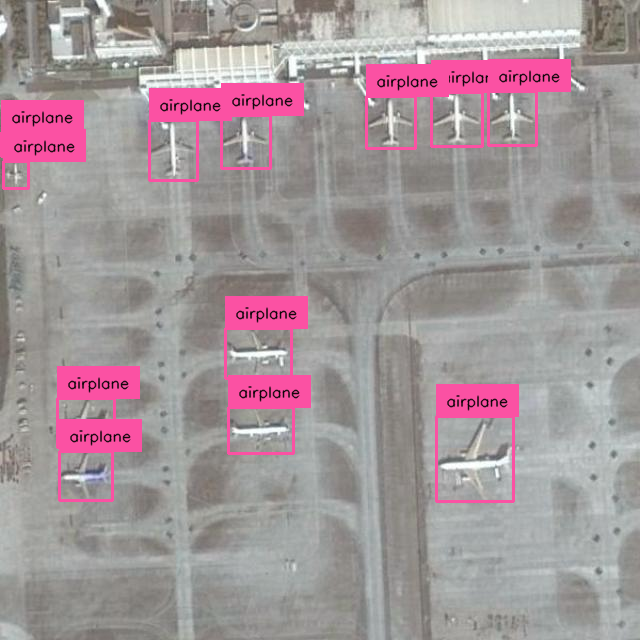

In [ ]:
annotated_image